In [65]:
#import packages

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [66]:
#create a data frame called risk, which contains a csv file of economic indicators which pertain to business cycles

risk=pd.read_csv('lags.csv',index_col='Date')

In [67]:
'''
visualize the end of the data. We use LEI, ISM, Michigan Sentiment and Curve which is 2s10s spread.
To avoid stationarity and incorporate the effects of time, we use 36 month rolling z-scores of year over year readings for each
vairable
'''

risk.tail()

,LEI Lag,ISM Lag,Sentiment Lag,Curve Lag
Date,,,,
Apr-84,1.222036,1.107408,1.437967,0.021248
Mar-84,1.327484,0.950975,1.947282,0.084138
Feb-84,1.598410,1.220136,1.803342,0.057121
Jan-84,1.732053,1.202214,2.199538,-0.040955
Dec-83,1.994867,2.206563,1.860698,-0.017764


In [68]:
'''
reduce the data into two dimension space using PCA
'''

pca = PCA(n_components=2).fit(risk)
reduced_data = pca.transform(risk)

In [69]:
h=.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [70]:
'''
we can use the k-means clustering algorithm on the reduce data to see if we are able to detect the 4 phases of the business cycle
'''

n_clusters=4
kmeans = KMeans(n_clusters)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

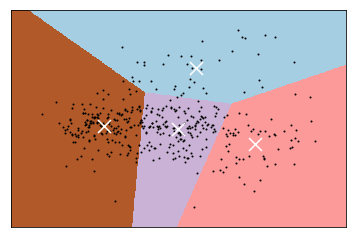

In [72]:
'''
Visualize the k-means clustering in two dimensional space. We can see some clusters have data points with smaller variance than
others. We can assume based off the visualization that the clusters with higher variance and smaller # of data points are
likely to be business cycle regimes which occur less frequently and with less duration i.e. late cycle or recession
'''

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [73]:
'''
We can see from the below which dates are classified in each cluster. As an example, Oct 08 and Nov 08 are known for
the Great Financial Crisis. We can assume Cluster 1 is Recessionary given some of its dates.
'''

for lbl in np.unique(kmeans.labels_):
    indices = np.where(kmeans.labels_ == lbl)
    print("Cluster %i" % lbl)
    print(list(risk.index[indices]))
    print("")

Cluster 0
['Jul-17', 'Mar-17', 'Feb-17', 'Jan-17', 'Dec-16', 'Nov-16', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13', 'Jul-13', 'Jun-13', 'May-13', 'Feb-13', 'Jan-13', 'Mar-08', 'Jul-07', 'Jan-07', 'Dec-06', 'Dec-01', 'Jan-00', 'Jul-99', 'May-99', 'Apr-99', 'Mar-99', 'Feb-99', 'Nov-98', 'Oct-98', 'Sep-96', 'Feb-96', 'Jan-96', 'Dec-95', 'Nov-95', 'Mar-91', 'Dec-89', 'Sep-85', 'Aug-85', 'Jul-85', 'Jun-85', 'May-85']

Cluster 1
['Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08', 'Jun-08', 'May-08', 'Apr-08', 'Feb-08', 'Jan-08', 'Dec-07', 'Nov-07', 'Nov-06', 'Sep-06', 'Aug-06', 'Jul-06', 'Jun-06', 'May-06', 'Nov-01', 'Oct-01', 'Sep-01', 'Aug-01', 'Jul-01', 'Jun-01', 'May-01', 'Apr-01', 'Mar-01', 'Feb-01', 'Jan-01', 'Dec-00', 'Oct-95', 'Sep-95', 'Jun-95', 'May-95', 'Apr-91', 'Feb-91', 'Jan-91', 'Dec-90', 'Nov-90', 'Oct-90', 'Sep-90', 'Aug-90', 'Jul-90', 'Jun-90', 'Feb-90', 'Jan-90', 'Nov-89', 'Oct-89', 'Sep-89', 'Aug-89', 'Jul-89', 'Jun-89', 'May-89

In [74]:
'''
Instead of visualizing, we can predict clusters directly onto the data frame if we wanted to export the data to a csv.
Note that doing it this way will change cluster #'s vs the visualization. 
'''
risk['Cluster']=kmeans.fit_predict(reduced_data)

In [78]:
risk.head(150)

,LEI Lag,ISM Lag,Sentiment Lag,Curve Lag,Cluster
Date,,,,,
Dec-18,0.265976,-0.427281,0.756541,-0.803329,2
Nov-18,0.713876,0.818880,0.571602,-1.046343,1
Oct-18,0.847391,0.532975,0.922572,-1.046772,1
Sep-18,1.717935,1.071498,1.389377,-1.370799,1
Aug-18,1.509332,1.452765,0.393406,-1.454105,1
Jul-18,1.561101,0.944762,0.876753,-1.524814,1
Jun-18,1.447868,1.401713,1.001466,-1.429101,1
May-18,1.513566,1.155955,0.974508,-1.095190,1
Apr-18,1.734155,1.008365,1.248190,-1.152565,1


In [11]:
risk.to_csv('risk_model.csv')

In [79]:
'''
We can see the average of each variable in each cluster. I.e., the average 36 month rolling z-score of LEI in Cluster 0
(recession), is -2.33. This makes sense given the LEI is a leading indicator. Cluster 1 seems to be late cycle as
most of the indicators are still positive except 2s10s curve. 2s10s tends to be at its lowest point just prior to any recession
'''

risk.groupby("Cluster").mean()

,LEI Lag,ISM Lag,Sentiment Lag,Curve Lag
Cluster,,,,
0,-2.338070,-1.772624,-1.522952,-0.562147
1,0.994155,0.993674,0.944711,-0.777402
2,-0.754282,-0.307181,-0.064586,-0.409592
3,-1.026451,-0.313652,0.536237,2.581964


In [81]:
'''
We can also import S&P 500 returns to add to the risk dataframe. This way we can visualize market returns within each cluster
'''

spx=pd.read_csv('spx.csv',index_col='Date')

In [82]:
'''
We shift S&P Returns down by 1 since the market reacts on prior data. I.e. Janaury market returns will reflect
December ISM or LEI data usually

'''

spx=spx.shift(1)

In [83]:
spx.head()

,% Change
Date,
Dec-18,NaN
Nov-18,-9.177696
Oct-18,1.785938
Sep-18,-6.940336
Aug-18,0.429430


In [84]:

'''
join the two data frames together
'''
spx_returns=risk.join(spx)

In [85]:
'''
Group by clusters to see market returns within each cluster on average.

If we defined Cluster 0 as a recession, we can see the market returns negatively in that cluster on average

We also defined Cluster 1 as late cycle, and we can see market returns diminish during the late cycle as well


'''

spx_returns.groupby(['Cluster'])['% Change'].mean()

Cluster
0   -0.149113
1    0.547555
2    1.181679
3    1.257968
Name: % Change, dtype: float64

In [86]:
spx_returns.tail()

,LEI Lag,ISM Lag,Sentiment Lag,Curve Lag,Cluster,% Change
Date,,,,,,
Apr-84,1.222036,1.107408,1.437967,0.021248,1,-5.935645
Mar-84,1.327484,0.950975,1.947282,0.084138,1,0.546551
Feb-84,1.598410,1.220136,1.803342,0.057121,1,1.349803
Jan-84,1.732053,1.202214,2.199538,-0.040955,1,-3.885931
Dec-83,1.994867,2.206563,1.860698,-0.017764,1,-0.921603
